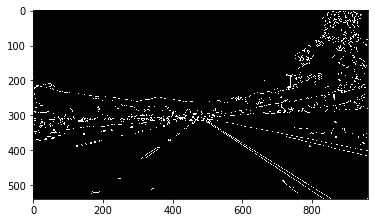

In [29]:
import sys
import numpy as np
import cv2
import matplotlib.pyplot as plt
from math import exp
%matplotlib inline

def gaussian_2d_filtering(cv_img, deviation = 0.4):
    nHeight, nWidth, nChannel = cv_img.shape
    
    m_bufGss = [0,0,0,0,0,0,0,0,0,0,0,0,0]
    
    m_dGaussian = deviation
    
    nHalf = int(max((m_dGaussian * 6 - 1) / 2, 1))
    nWstep = nWidth * nChannel
    
    pIn = cv_img.flatten()
    pTmp = (np.zeros(shape=(nWidth,nHeight,nChannel))).flatten()
    pOut = (np.zeros(shape=(nWidth,nHeight,nChannel))).flatten()
    
    n = 0
    while n <= nHalf:
      m_bufGss[nHalf - n] = m_bufGss[nHalf + n] = exp((-1 * n) * n / (2 * m_dGaussian*m_dGaussian)) 
      n += 1 

    for r in range(0, nHeight):
      for c in range(0, nWidth):
        for l in range(0, nChannel):
          dSum = dGss = 0
    
          for n in range(-1 * nHalf, nHalf+1):
            px = c + n
            
            if 0 <= px < nWidth:
                dSum += (pIn[nWstep * r + nChannel * px + l] * m_bufGss[nHalf + n])
                dGss += m_bufGss[nHalf + n]
          
          pTmp[nWstep * r + nChannel * c + l] = int(dSum / dGss)
    
    for r in range(0, nHeight):
      for c in range(0, nWidth):
        for l in range(0, nChannel):
          dSum = dGss = 0
    
          for n in range(-1 * nHalf, nHalf+1):
            py = r + n
            if 0 <= py < nHeight:
              absN = abs(n)
              dSum += (pTmp[nWstep * py + nChannel * c + l] * m_bufGss[nHalf + absN])
              dGss += m_bufGss[nHalf + absN]
            
          pOut[nWstep * r + nChannel * c + l] = int(dSum / dGss)
    np.set_printoptions(threshold=sys.maxsize)
    
    pResult = pOut.reshape(nHeight,nWidth,nChannel)
    pResult = pResult.astype('uint8')
    
    return pResult

cv_img = cv2.imread('road.jpg')
cv_img = cv2.cvtColor(cv_img, cv2.COLOR_BGR2RGB)

# Implemented gaussian blur ( very slow ) 
pResult = gaussian_2d_filtering(cv_img, 0.8)

# OpenCV gaussian blur library ( fast & good )
# pResult = cv2.GaussianBlur(cv_img, (5, 5),5)

plt.imshow(pResult)